In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from itertools import permutations
import itertools



In [4]:
def get_sorted_substitutions(distances_df):
    substitutions = {}
    amino_acids = distances_df.index

    for i, source_acid in enumerate(amino_acids):
        for j, target_acid in enumerate(amino_acids):
            if i < j:
                distance = distances_df.loc[source_acid, target_acid]
                substitutions[(source_acid, target_acid)] = distance

    sorted_substitutions = dict(sorted(substitutions.items(), key=lambda x: x[1]))
    return sorted_substitutions

In [3]:
def get_sorted_substitutions(distances_df):
    substitutions = {}
    amino_acids = distances_df.index

    for i, source_acid in enumerate(amino_acids):
        for j, target_acid in enumerate(amino_acids):
            if i < j:
                distance = distances_df.loc[source_acid, target_acid]
                substitutions[(source_acid, target_acid)] = distance

    sorted_substitutions = dict(sorted(substitutions.items(), key=lambda x: x[1]))

    # Convert to DataFrame
    data = []
    for (source_acid, target_acid), distance in sorted_substitutions.items():
        data.append({'aa1': source_acid, 'aa2': target_acid, 'cost': distance})
    
    df = pd.DataFrame(data)
    return df

In [40]:
def get_all_combinations(subset_df, max_subset_len):
    # Create a list of new rows
    new_rows = []
    for r in range(2, max_subset_len):
        for comb in itertools.combinations(range(len(subset_df)), r):
            comb_df = subset_df.loc[list(comb)]  # Filter the DataFrame based on comb
            aa1 = comb_df['aa1'].str.cat()
            aa2 = comb_df['aa2'].str.cat()
            cost = comb_df['cost'].sum()
            new_rows.append({'aa1': aa1, 'aa2': aa2, 'cost': cost})

    # Concatenate new rows to the DataFrame
    subset_df = pd.concat([subset_df, pd.DataFrame(new_rows)], ignore_index=True)


    return subset_df


In [5]:
def get_subset_df(sorted_amino, seq):

    letters = list(seq)

    # Create a DataFrame to hold the filtered rows
    filtered_df = pd.DataFrame(columns=sorted_amino.columns)

    for letter in letters:
        # Filter rows where the letter appears in aa1 or aa2
        temp_df = sorted_amino[(sorted_amino['aa1'] == letter) | (sorted_amino['aa2'] == letter)]

        # Append filtered rows to the result DataFrame
        filtered_df = pd.concat([filtered_df, temp_df.astype(str)], ignore_index=True)

    return filtered_df


In [6]:
distances_csv = "../distance_matrix.csv"
distances_df = pd.read_csv(distances_csv, index_col=0)

sorted_amino_df = get_sorted_substitutions(distances_df)

In [59]:
print(get_all_combinations(sorted_amino_df, 5))

KeyboardInterrupt: 

In [71]:
seq = "C"

subset_df = get_subset_df(sorted_amino_df, seq)
subset_df["cost"] = pd.to_numeric(subset_df["cost"])

get_all_combinations(subset_df, 3)
# subset_df

,aa1,aa2,cost
0,C,W,2.086457
1,C,H,2.119465
2,C,V,2.604878
3,C,L,2.878224
4,C,P,2.985714
...,...,...,...
185,CC,YS,9.728251
186,CC,YR,9.761360
187,CC,DS,9.890161
188,CC,DR,9.923270


In [14]:
sorted_amino_df

,aa1,aa2,cost
0,F,I,0.949239
1,A,L,1.248024
2,L,V,1.284128
3,F,M,1.451638
4,D,Q,1.630393
...,...,...,...
185,S,T,8.096340
186,D,Y,8.333166
187,M,S,8.668166
188,R,S,8.673774


In [3]:
def seq_to_dict(seq):
    result_dict = {}
    for idx, char in enumerate(seq):
        if char in result_dict:
            result_dict[char].append(idx)
        else:
            result_dict[char] = [idx]
    return result_dict


In [ ]:

def letter_permutations(string, letters, length):
    indexes = [(i, char) for i, char in enumerate(string) if char in letters]
    result = []
    for perm in permutations(indexes, length):
        if len(set(item[1] for item in perm)) == len(letters):
            result.append([(item[1], item[0]) for item in perm])
    # Convert the list of lists into a set of tuples and back to a list to remove duplicates
    result = list(set(tuple(sorted(perm)) for perm in result))
    return [list(perm) for perm in result]

# Example usage:
string = "FAFFB"
letters = ['F', 'F']
print(letter_permutations(string, set(letters), len(letters)))

In [23]:
from tqdm import tqdm

def find_couples(sequences_set, sorted_amino, max_neighbors=1):
    couples = {}
    for seq in tqdm(sequences_set, desc="Progress", unit=" sequence"):
        dict_seq = seq_to_dict(seq)
        couples[seq] = []
        flag = 0
        for sub in sorted_amino:
            if sub[0] not in dict_seq:
                continue

            if flag < max_neighbors:
                for occ in dict_seq[sub[0]]:
                    seq_to_search = seq[:occ] + sub[1] + seq[occ + 1:]
                    distance = sub[2]
                    if seq_to_search in sequences_set:
                        couples[seq].append([seq_to_search, distance])
                        flag += 1
                        if flag < max_neighbors:
                            break
            else:
                break

    return couples


In [7]:
def get_sorted_substitutions(distances_df):
    substitutions = {}
    amino_acids = distances_df.index

    for i, source_acid in enumerate(amino_acids):
        substitutions[source_acid] = {}
        for j, target_acid in enumerate(amino_acids):
            if i != j:
                distance = distances_df.loc[source_acid, target_acid]
                substitutions[source_acid][target_acid] = distance

    for acid, sub_dict in substitutions.items():
        substitutions[acid] = dict(sorted(sub_dict.items(), key=lambda x: x[1]))

    return substitutions

In [8]:
distances_csv = "../distance_matrix.csv"
distances_df = pd.read_csv(distances_csv, index_col=0)

sorted_amino = get_sorted_substitutions(distances_df)

In [9]:
sorted_amino

{'A': {'L': 1.248024438863278,
  'V': 1.7296837861297076,
  'C': 3.22868626534075,
  'E': 3.3618350643658887,
  'I': 3.391636478162128,
  'F': 3.4270976058466736,
  'H': 3.434634478368841,
  'T': 3.769443725538293,
  'K': 3.827239997700692,
  'N': 3.900459203734863,
  'P': 3.965706872677304,
  'Q': 3.993842135087465,
  'M': 4.152536694600061,
  'W': 4.167662414351719,
  'G': 4.264347429560588,
  'R': 4.649690742404273,
  'D': 5.171081414946007,
  'Y': 5.337223341776133,
  'S': 5.541561151877691},
 'C': {'W': 2.0864565655675653,
  'H': 2.1194647909318998,
  'V': 2.604877924202975,
  'L': 2.878224105242676,
  'P': 2.985713650034109,
  'F': 3.1046128583126107,
  'A': 3.22868626534075,
  'N': 3.488865001687512,
  'Q': 3.605433954463734,
  'I': 3.624447406157248,
  'M': 4.007916665800326,
  'G': 4.095790521987178,
  'K': 4.1528827337164245,
  'T': 4.16767021248083,
  'E': 4.249947999681878,
  'Y': 4.64025085528789,
  'D': 4.802160347177091,
  'S': 5.088000491352178,
  'R': 5.121109352474325

In [17]:
# read distance matrix

sequences_csv = '../files/forchen_F_26L.csv'
sequences_header = "cdr3_amino_acid"

# sequences_csv = '../files/for_chen_B.csv'
# sequences_header = "CDR3.aa"

# sequences_csv = "../random_sequences.csv"
# sequences_header = "sequences"

sequences_df = pd.read_csv(sequences_csv)

sequences_set = set(sequences_df[sequences_header].unique())

# sequences_set.add("CASSLALAGGTDTQYI")
# sequences_set.add("CASSLALAGGTDTQYC")

sorted_amino = get_sorted_substitutions(distances_df)
couples = find_couples(sequences_set, sorted_amino, max_neighbors=1)


Progress:   4%|▍         | 42930/1000746 [00:15<05:53, 2709.35 sequence/s]


KeyboardInterrupt: 

In [49]:
import json

with open("../couples.json") as json_file:
    couples = json.load(json_file)


In [50]:
# Create a graph
G = nx.Graph()

# Add edges to the graph based on the dictionary
for node, neighbors in couples.items():
    for neighbor, weight in neighbors:
        G.add_edge(node, neighbor, weight=weight)

In [51]:
def get_edges_colors(G):
    # color edegs according to their connection, the greener the color the stringer the connection
    # Create a colormap ranging from red to green
    cmap = plt.cm.RdYlGn_r

    # Find the maximum and minimum weights
    max_weight = max([d['weight'] for _, _, d in G.edges(data=True)])
    min_weight = min([d['weight'] for _, _, d in G.edges(data=True)])

    # Normalize the weights
    norm = mcolors.Normalize(vmin=min_weight, vmax=max_weight)

    # Create a color mapping based on edge weights
    edge_colors = [cmap(norm(d['weight'])) for _, _, d in G.edges(data=True)]
    return edge_colors
    

### Visualize the whole graph

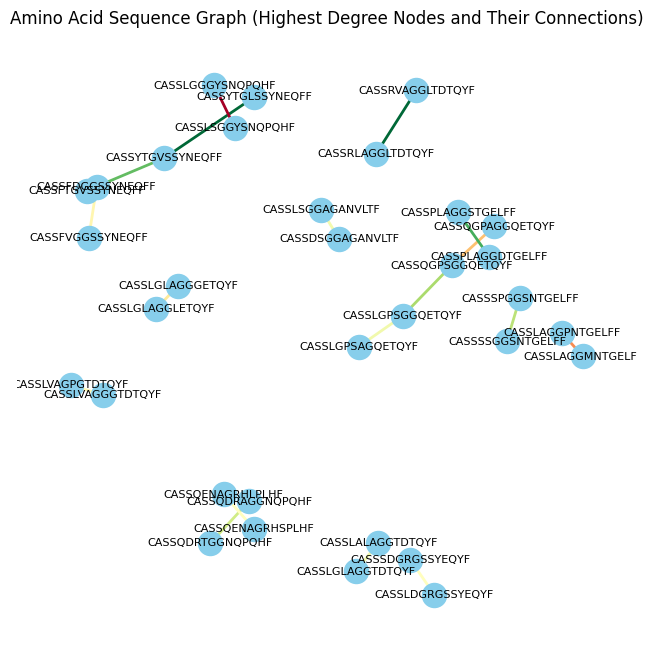

In [52]:

edge_colors = get_edges_colors(G)
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G, k=0.3, iterations=20)
nx.draw_networkx_nodes(G, pos, node_size=300, node_color='skyblue')
nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=2)
nx.draw_networkx_labels(G, pos, font_size=8)
plt.title('Amino Acid Sequence Graph (Highest Degree Nodes and Their Connections)')
plt.axis('off')  # Turn off axis
plt.savefig('sequence_graph_highest_degree_with_connections.png')
plt.show()

### Highest degree node

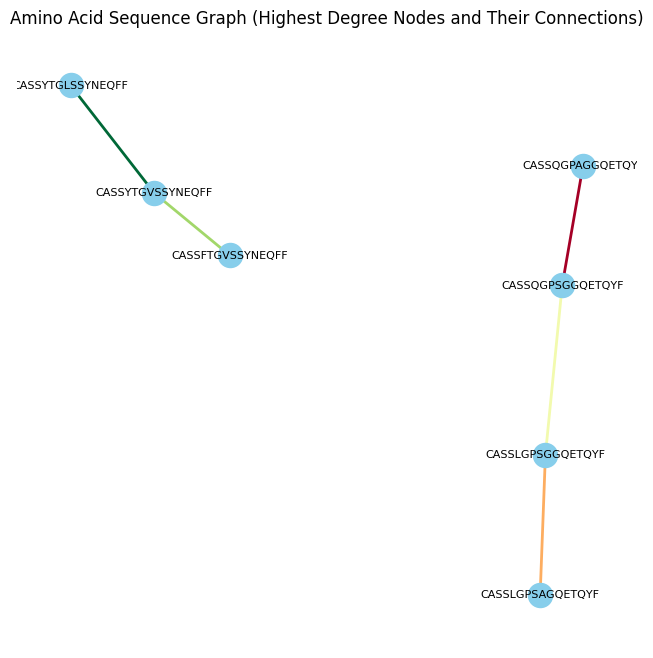

In [53]:
max_degree = max(dict(G.degree()).values())
highest_degree_nodes = [node for node, degree in dict(G.degree()).items() if degree == max_degree]

# Create a subgraph with only the highest degree nodes and their neighbors
highest_degree_neighbors = set()
for node in highest_degree_nodes:
    highest_degree_neighbors.update(G.neighbors(node))
highest_degree_neighbors.update(highest_degree_nodes)
H = G.subgraph(highest_degree_neighbors)

edge_colors = get_edges_colors(H)

# Visualize the graph
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(H, k=0.3, iterations=20)
nx.draw_networkx_nodes(H, pos, node_size=300, node_color='skyblue')
nx.draw_networkx_edges(H, pos, edge_color=edge_colors, width=2)
nx.draw_networkx_labels(H, pos, font_size=8)
plt.title('Amino Acid Sequence Graph (Highest Degree Nodes and Their Connections)')
plt.axis('off')  # Turn off axis
plt.savefig('sequence_graph_highest_degree_with_connections.png')
plt.show()


### Longest path

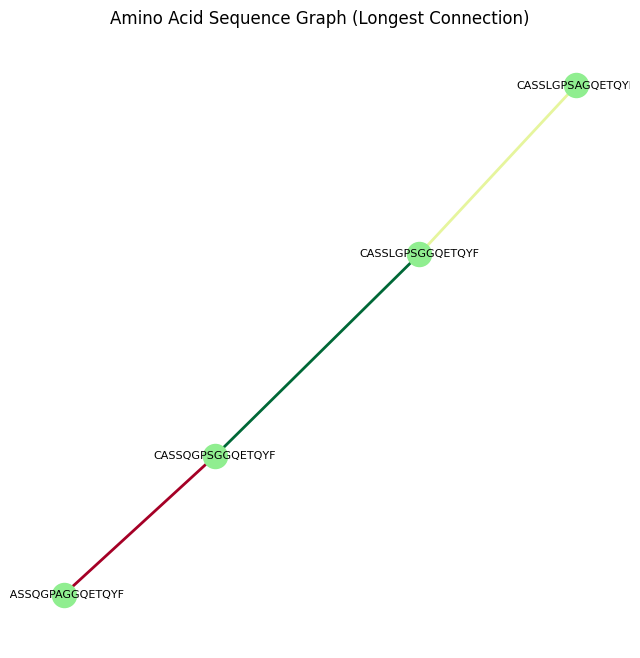

In [54]:
# Find the longest path in the graph
longest_path = max(nx.all_pairs_shortest_path_length(G), key=lambda x: max(x[1].values()))

# Extract nodes involved in the longest path
longest_path_nodes = longest_path[1].keys()

# Create a subgraph with nodes involved in the longest path
H = G.subgraph(longest_path_nodes)

edge_colors = get_edges_colors(H)


# Visualize the graph
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(H, k=0.3, iterations=20)
nx.draw_networkx_nodes(H, pos, node_size=300, node_color='lightgreen')
nx.draw_networkx_edges(H, pos, edge_color=edge_colors, width=2)
nx.draw_networkx_labels(H, pos, font_size=8)
plt.title('Amino Acid Sequence Graph (Longest Connection)')
plt.axis('off')  # Turn off axis
plt.savefig('sequence_graph_longest_connection.png')
plt.show()